In [86]:
import numpy as np
import igraph as ig 
import matplotlib.pyplot as plt
from pandas import DataFrame
from os import listdir

Helper Methods

In [87]:
# load all dataset names and graph data from "graphs" directory
def get_data(dir="graphs/"):
    files = sorted(listdir(dir))

    dataset_names = []
    wrong_graphs, correct_graphs = [], []

    for file in files:
        if file.endswith("wrong_graphs.npy"):
            dataset_names.append(file.replace("_wrong_graphs.npy", ""))

            data_wrong_graphs = np.load(dir+file, allow_pickle=True)
            wrong_graphs.append(data_wrong_graphs)

        if file.endswith("right_graphs.npy"):
            data_right_graphs = np.load(dir+file, allow_pickle=True)
            correct_graphs.append(data_right_graphs)

    return dataset_names, wrong_graphs, correct_graphs

In [88]:
def get_cna_metrics(datasets: list):
    # maps the index of graph_metrics to the metric name (needed to label automatically in visualization)
    index_to_metric = {0: 'Number of Vertices',
                       1: 'Number of Cliques',
                       2: 'Maximum Degree',
                       3: 'Minimum Degree',
                       4: 'Average Degree',
                       5: 'assortativity',
                       6: 'Density',
                       7: 'Average Neighbor Degree'}

    # list of graph metrics for each dataset
    all_graph_metrics = []

    for i, dataset in enumerate(datasets):
        graph_metrics = np.zeros((len(dataset), len(index_to_metric.keys())))

        for j, graph_data in enumerate(dataset):
            graph = ig.Graph.Adjacency(graph_data, mode='undirected')

            vcount = graph.vcount()
            cliques = graph.clique_number()
            max_deg = graph.maxdegree()
            min_degree = min(graph.degree())
            avg_deg = np.average(graph.degree())
            assortativity = graph.assortativity_degree()

            density = graph.density(loops=True)
            avg_neighbor_deg = np.average(np.array(graph.knn()[0]))
            # graph.knn()[1] knn for each node degree.  The zeroth element of this list corresponds to vertices of degree 1.

            graph_metrics[j] = np.array([vcount, cliques, max_deg,
                                min_degree,  avg_deg, assortativity, density, avg_neighbor_deg])

        all_graph_metrics.append(graph_metrics)
    return all_graph_metrics, index_to_metric


In [136]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)


In [163]:
def plot_boxplot(wrong_class_metrics: list, correct_class_metrics: list, index: int, index_to_metric: dict, dataset_names: list):
    data_wrong_class = [dataset[:, index]
                         for dataset in wrong_class_metrics]
    
    data_right_class = [dataset[:, index]
                        for dataset in correct_class_metrics]

    x = np.arange(len(dataset_names))
    print(f"{x}")
    width = 0.15
    distance = 0.2

    fig, ax = plt.subplots(figsize=(9,4))
    boxplot_wrong = ax.boxplot(data_wrong_class,
                               positions=x-distance)
    boxplot_right = ax.boxplot(data_right_class,
                               positions=x+distance)

    set_box_color(boxplot_wrong, '#D7191C')
    set_box_color(boxplot_right, '#2C7BB6')

    metric = index_to_metric[index]
    ax.set_title(f"Value range of {metric} for Classified Graphs")
    ax.set_ybound(lower=0)
    ax.set_xticks(x, dataset_names)
    ax.set_ylabel(metric)
    ax.legend()
    fig.tight_layout()

    # helpful operations to create labels that are visible in the legend
    plt.plot([], c='#D7191C', label='Wrong classified graphs')
    plt.plot([], c='#2C7BB6', label='Correctly classified graphs')
    plt.legend()
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0 1 2]


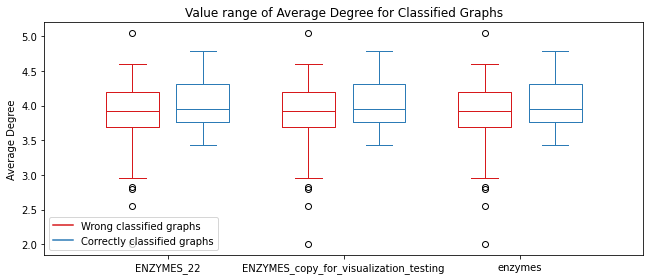

In [164]:
dataset_names, wrong_graphs, correct_graphs = get_data()

all_graph_metrics_wrong, index_to_metric = get_cna_metrics(wrong_graphs)
all_graph_metrics_right, index_to_metric = get_cna_metrics(correct_graphs)

plot_boxplot(all_graph_metrics_wrong, all_graph_metrics_right,
             4, index_to_metric, dataset_names)


Execute above functions to visualize results of CNA metric for all datasets 

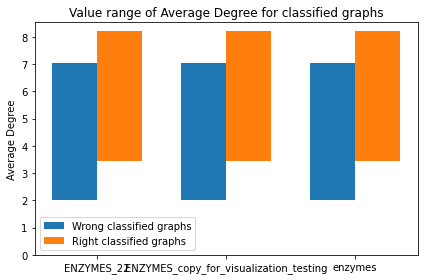

In [94]:
dataset_names, wrong_graphs, correct_graphs = get_data()

all_graph_metrics_wrong, index_to_metric = get_cna_metrics(wrong_graphs)
all_graph_metrics_right, index_to_metric = get_cna_metrics(correct_graphs)

plot_value_range(all_graph_metrics_wrong, all_graph_metrics_right, 4, index_to_metric,dataset_names)


Wrong Classified Graphs

In [6]:
dt = np.load("wrong_graphs.npy", allow_pickle=True)
type(dt)

graph = ig.Graph.Adjacency(dt[2], mode='undirected')
ig.plot(graph)

FileNotFoundError: [Errno 2] No such file or directory: 'wrong_graphs.npy'

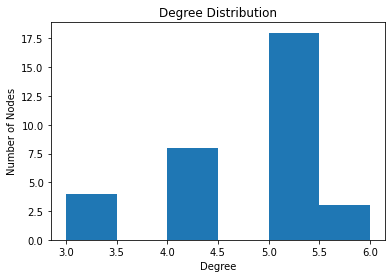

In [ ]:
# plot degree distribution
bins = graph.maxdegree()
plt.hist(graph.degree(), bins)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.show()


In [ ]:
vcount = graph.vcount()

cliques = graph.clique_number()
max_deg = graph.maxdegree()
min_degree = min(graph.degree())
avg_deg = np.average(graph.degree())
assortativity = graph.assortativity_degree()

graph.density(loops=True)
avg_neighbor_deg = np.average(np.array(graph.knn()[0]))
# graph.knn()[1] knn for each node degree.  The zeroth element of this list corresponds to vertices of degree 1.


62
28


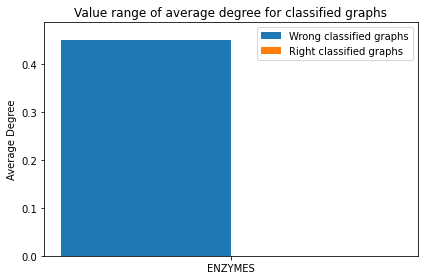

In [ ]:
data_wrong_class = np.load("wrong_graphs.npy", allow_pickle=True)
wrong_class_array = get_cna_metrics(data_wrong_class)
print(len(wrong_class_array))

data_right_class = np.load("right_graphs.npy", allow_pickle=True)
correct_class_array = get_cna_metrics(data_right_class)
print(len(correct_class_array))

plot_value_range(wrong_class_array, correct_class_array, 5)


In [14]:
data_wrong_class = np.load("graphs/enzymes_wrong_graphs.npy", allow_pickle=True)

avg_degs = []
for graph_data in data_wrong_class:
    graph = ig.Graph.Adjacency(graph_data, mode='undirected')
    avg_deg = graph.maxdegree()
    avg_degs.append(avg_deg)

len(avg_degs)

62

In [15]:
np.mean(np.array(avg_degs))

6.112903225806452

In [165]:
# get the cna metrics from the correctly and wrong classified data, including the index of the metric of interest
def plot_value_range(wrong_class_metrics: list, correct_class_metrics: list, index: int, index_to_metric: dict, dataset_names: list):
    y_top_wrong_class = [max(dataset[:, index])
                         for dataset in wrong_class_metrics]
    y_top_right_class = [max(dataset[:, index])
                         for dataset in correct_class_metrics]

    #set lower border of bar to visualize value range
    y_bottom_wrong = [min(dataset[:, index])
                      for dataset in wrong_class_metrics]
    y_bottom_right = [min(dataset[:, index])
                      for dataset in correct_class_metrics]

    x = np.arange(len(dataset_names))
    width = 0.35

    fig, ax = plt.subplots()
    rect1 = ax.bar(x-width/2, y_top_wrong_class, width,
                   label='Wrong classified graphs', bottom=y_bottom_wrong)
    rect2 = ax.bar(x+width/2, y_top_right_class, width,
                   label='Right classified graphs', bottom=y_bottom_right)

    metric = index_to_metric[index]
    ax.set_title(f"Value range of {metric} for classified graphs")
    ax.set_ybound(lower=0)
    ax.set_xticks(x, dataset_names)
    ax.set_ylabel(metric)
    plt.legend()
    fig.tight_layout()
    plt.show()
